# Importing require library

In [1]:
import pandas as pd # for data wrangling purpose
import numpy as np # Basic computation library
import seaborn as sns # For Visualization 
import matplotlib.pyplot as plt # ploting package
%matplotlib inline
import warnings # Filtering warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing Insurance Claims dataset Csv file using pandas
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/Automobile_insurance_fraud.csv')
print('No of Rows:',df.shape[0])
print('No of Columns:',df.shape[1])
df.head()

No of Rows: 1000
No of Columns: 40


,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [3]:
# Sort columns by datatypes
df.columns.to_series().groupby(df.dtypes).groups

{int64: ['months_as_customer', 'age', 'policy_number', 'policy_deductable', 'umbrella_limit', 'insured_zip', 'capital-gains', 'capital-loss', 'incident_hour_of_the_day', 'number_of_vehicles_involved', 'bodily_injuries', 'witnesses', 'total_claim_amount', 'injury_claim', 'property_claim', 'vehicle_claim', 'auto_year'], float64: ['policy_annual_premium', '_c39'], object: ['policy_bind_date', 'policy_state', 'policy_csl', 'insured_sex', 'insured_education_level', 'insured_occupation', 'insured_hobbies', 'insured_relationship', 'incident_date', 'incident_type', 'collision_type', 'incident_severity', 'authorities_contacted', 'incident_state', 'incident_city', 'incident_location', 'property_damage', 'police_report_available', 'auto_make', 'auto_model', 'fraud_reported']}

### Statistical Analysis

In [4]:
df.duplicated('policy_number').sum()

0

In [5]:
df.isin([' ','NA','-']).sum().any()

False

In [6]:
df.isin(['?']).sum()

months_as_customer               0
age                              0
policy_number                    0
policy_bind_date                 0
policy_state                     0
policy_csl                       0
policy_deductable                0
policy_annual_premium            0
umbrella_limit                   0
insured_zip                      0
insured_sex                      0
insured_education_level          0
insured_occupation               0
insured_hobbies                  0
insured_relationship             0
capital-gains                    0
capital-loss                     0
incident_date                    0
incident_type                    0
collision_type                 178
incident_severity                0
authorities_contacted            0
incident_state                   0
incident_city                    0
incident_location                0
incident_hour_of_the_day         0
number_of_vehicles_involved      0
property_damage                360
bodily_injuries     

In [7]:
df=df.replace('?',np.NaN)

### Missing value check

In [9]:
#Finding what percentage of data is missing from the dataset
missing_values = df.isnull().sum().sort_values(ascending = False)
percentage_missing_values =(missing_values/len(df))*100
print(pd.concat([missing_values, percentage_missing_values], axis =1, keys =['Missing Values', '% Missing data']))

                             Missing Values  % Missing data
_c39                                   1000           100.0
property_damage                         360            36.0
police_report_available                 343            34.3
collision_type                          178            17.8
bodily_injuries                           0             0.0
incident_state                            0             0.0
incident_city                             0             0.0
incident_location                         0             0.0
incident_hour_of_the_day                  0             0.0
number_of_vehicles_involved               0             0.0
fraud_reported                            0             0.0
auto_year                                 0             0.0
auto_model                                0             0.0
authorities_contacted                     0             0.0
total_claim_amount                        0             0.0
injury_claim                            

property_damage','police_report_available','collision_type' contain missing values.

_c39 columns with 100 % null value. We gone drop it.

Other missing value feature are categorical in nature. We gone impute them with mode of that particular category.

### Missing value imputation

In [10]:
df['property_damage'].fillna(df['property_damage'].mode()[0],inplace=True)
df['police_report_available'].fillna(df['police_report_available'].mode()[0],inplace=True)
df['collision_type'].fillna(df['collision_type'].mode()[0],inplace=True)

In [11]:
# Droping unnecessary columns
df.drop(['_c39','incident_location','insured_zip','policy_number'],axis=1,inplace=True)

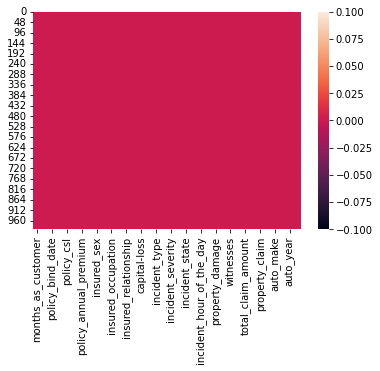

In [13]:
# Heatmap of missing value
sns.heatmap(df.isnull())
plt.show()

No Missing Value

######  Details on Policy_csl column :

Combined single limit (CSL): CSL is a single number that describes the predetermined limit for the combined total of the Bodily Injury Liability coverage and Property Damage Liability coverage per occurrence or accident.

In this dataset Policy_csl columns have numerical data separated by '/', resulting into object datatype.

We will split this column into two CSL columns for person and accident.

In [15]:
# Spliting and extracting policy_csl at '/'
df['CSL_Personal']=df.policy_csl.str.split('/',expand=True)[0]
df['CSL_Accidental']=df.policy_csl.str.split('/',expand=True)[1]

In [16]:
 #Now we can drop policy_csl column 
df.drop("policy_csl",axis=1,inplace=True)

In [17]:
# Converting Date columns from object type into datetime data type
df['policy_bind_date']=pd.to_datetime(df['policy_bind_date'])
df['incident_date']=pd.to_datetime(df['incident_date'])

In [18]:
# Extracting Day, Month and Year column from policy_bind_date
df['policy_bind_day'] = df['policy_bind_date'].dt.day
df['policy_bind_month'] = df['policy_bind_date'].dt.month
df['policy_bind_year'] = df['policy_bind_date'].dt.year

# Extracting Day, Month and Year column from incident_date
df['incident_day'] = df['incident_date'].dt.day
df['incident_month'] = df['incident_date'].dt.month
df['incident_year'] = df['incident_date'].dt.year

In [19]:
# Since Extraction is done now we can Drop policy_bind_date and incident_date columns
df.drop(['policy_bind_date','incident_date'],axis=1,inplace=True)

In [20]:
# Incident year for all data is 2015 so we gone drop it.
df.drop(['incident_year'],axis=1,inplace=True)

'auto_year' which depict year from which Automobile in operational on road.

Feature engineering to create new columns with automobile age and drop eariler.


In [21]:
# Lets extract age of the vehicle from auto_year by subtracting it from the year 2018
df['Automobile_Age']=2015 - df['auto_year']
# Droping auto year column
df.drop("auto_year",axis=1,inplace=True)

In [23]:
df.columns.to_series().groupby(df.dtypes).groups

{int64: ['months_as_customer', 'age', 'policy_deductable', 'umbrella_limit', 'capital-gains', 'capital-loss', 'incident_hour_of_the_day', 'number_of_vehicles_involved', 'bodily_injuries', 'witnesses', 'total_claim_amount', 'injury_claim', 'property_claim', 'vehicle_claim', 'policy_bind_day', 'policy_bind_month', 'policy_bind_year', 'incident_day', 'incident_month', 'Automobile_Age'], float64: ['policy_annual_premium'], object: ['policy_state', 'insured_sex', 'insured_education_level', 'insured_occupation', 'insured_hobbies', 'insured_relationship', 'incident_type', 'collision_type', 'incident_severity', 'authorities_contacted', 'incident_state', 'incident_city', 'property_damage', 'police_report_available', 'auto_make', 'auto_model', 'fraud_reported', 'CSL_Personal', 'CSL_Accidental']}

In [22]:
Category = ['policy_state',  'insured_sex', 'insured_education_level', 'insured_occupation', 
            'insured_hobbies', 'insured_relationship', 'incident_type', 'collision_type', 'incident_severity',
            'authorities_contacted','incident_state', 'incident_city', 'property_damage','police_report_available',
            'auto_make','auto_model', 'fraud_reported']
    
Numerical = ['months_as_customer','CSL_Personal','CSL_Accidental', 'age', 'policy_deductable', 'umbrella_limit', 'capital-gains', 'capital-loss', 
             'incident_hour_of_the_day', 'number_of_vehicles_involved', 'bodily_injuries', 'witnesses', 
             'total_claim_amount','injury_claim', 'property_claim', 'vehicle_claim', 'Automobile_Age','policy_annual_premium']

#### Statistical Matrix

In [24]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
months_as_customer,1000.0,2.039540e+02,1.151132e+02,0.00,115.7500,199.5,276.250,479.00
age,1000.0,3.894800e+01,9.140287e+00,19.00,32.0000,38.0,44.000,64.00
policy_deductable,1000.0,1.136000e+03,6.118647e+02,500.00,500.0000,1000.0,2000.000,2000.00
policy_annual_premium,1000.0,1.256406e+03,2.441674e+02,433.33,1089.6075,1257.2,1415.695,2047.59
umbrella_limit,1000.0,1.101000e+06,2.297407e+06,-1000000.00,0.0000,0.0,0.000,10000000.00
capital-gains,1000.0,2.512610e+04,2.787219e+04,0.00,0.0000,0.0,51025.000,100500.00
capital-loss,1000.0,-2.679370e+04,2.810410e+04,-111100.00,-51500.0000,-23250.0,0.000,0.00
incident_hour_of_the_day,1000.0,1.164400e+01,6.951373e+00,0.00,6.0000,12.0,17.000,23.00
number_of_vehicles_involved,1000.0,1.839000e+00,1.018880e+00,1.00,1.0000,1.0,3.000,4.00
bodily_injuries,1000.0,9.920000e-01,8.201272e-01,0.00,0.0000,1.0,2.000,2.00


In [25]:
df[Category].describe().T

,count,unique,top,freq
policy_state,1000,3,OH,352
insured_sex,1000,2,FEMALE,537
insured_education_level,1000,7,JD,161
insured_occupation,1000,14,machine-op-inspct,93
insured_hobbies,1000,20,reading,64
insured_relationship,1000,6,own-child,183
incident_type,1000,4,Multi-vehicle Collision,419
collision_type,1000,3,Rear Collision,470
incident_severity,1000,4,Minor Damage,354
authorities_contacted,1000,5,Police,292


In [30]:
for i in Category:
    print(i)
    print(df[i].value_counts())
    print("<!>"*20)

policy_state
OH    352
IL    338
IN    310
Name: policy_state, dtype: int64
<!><!><!><!><!><!><!><!><!><!><!><!><!><!><!><!><!><!><!><!>
insured_sex
FEMALE    537
MALE      463
Name: insured_sex, dtype: int64
<!><!><!><!><!><!><!><!><!><!><!><!><!><!><!><!><!><!><!><!>
insured_education_level
JD             161
High School    160
Associate      145
MD             144
Masters        143
PhD            125
College        122
Name: insured_education_level, dtype: int64
<!><!><!><!><!><!><!><!><!><!><!><!><!><!><!><!><!><!><!><!>
insured_occupation
machine-op-inspct    93
prof-specialty       85
tech-support         78
sales                76
exec-managerial      76
craft-repair         74
transport-moving     72
other-service        71
priv-house-serv      71
armed-forces         69
adm-clerical         65
protective-serv      63
handlers-cleaners    54
farming-fishing      53
Name: insured_occupation, dtype: int64
<!><!><!><!><!><!><!><!><!><!><!><!><!><!><!><!><!><!><!><!>
insured_hobbi

# Exploratory Data Analysis

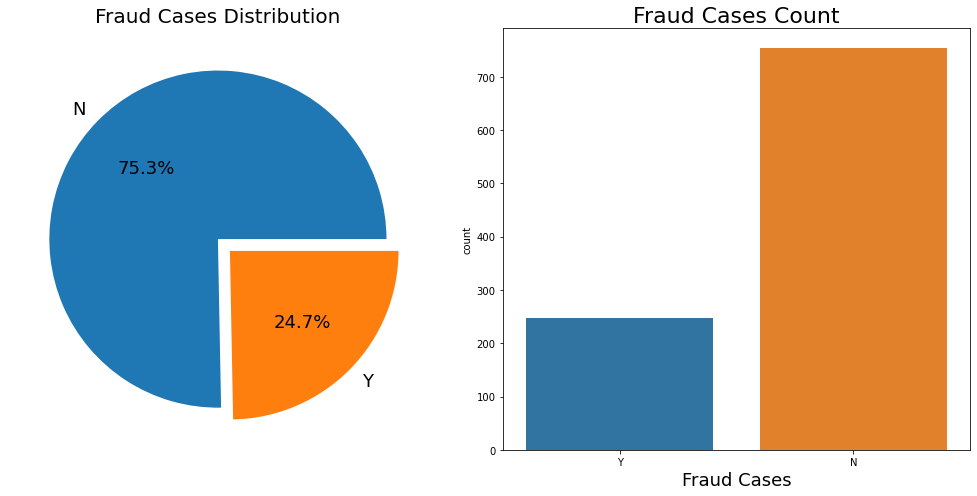

In [32]:
plt.rcParams["figure.autolayout"] = True
f,ax=plt.subplots(1,2,figsize=(14,7))
df['fraud_reported'].value_counts().plot.pie(explode=[0,0.1],autopct='%3.1f%%',fontsize=18, ax=ax[0])
ax[0].set_title('Fraud Cases Distribution', fontsize=20)
ax[0].set_ylabel('')
sns.countplot('fraud_reported',data=df,ax=ax[1])
ax[1].set_title('Fraud Cases Count',fontsize=22)
ax[1].set_xlabel("Fraud Cases",fontsize=18)
plt.show()

Out of all cases around 24.7 % cases are Fraud.

'fraud_reported' is our target variable to be predicted. From count plot we can say dataset is imbalanced in nature.

###### Analysing Age vs Fraud

In [33]:
print('Minimum Age :',df.age.min(),'Years')
print('Maximum Age :',df.age.max(),'Years')
print('Average Age :',df.age.mean(),'Years')

Minimum Age : 19 Years
Maximum Age : 64 Years
Average Age : 38.948 Years


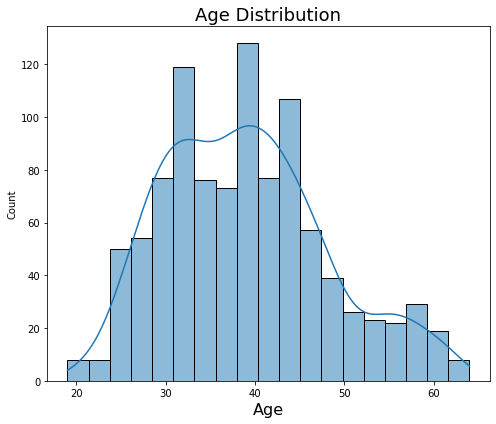

In [35]:
plt.figure(figsize=(7,6))
sns.histplot(df.age, kde=True)
plt.xlabel('Age',fontsize=16)
plt.title('Age Distribution', fontsize=18)
plt.show()


In [36]:
# Spliting age in different age range
df['age_bins'] = pd.cut(df.age, bins = [0, 10, 20, 30, 40, 50, 60, 70], 
                          include_lowest = True, labels = ['0-10','11-20','21-30','31-40', '41-50', '51-60', '61-70'])

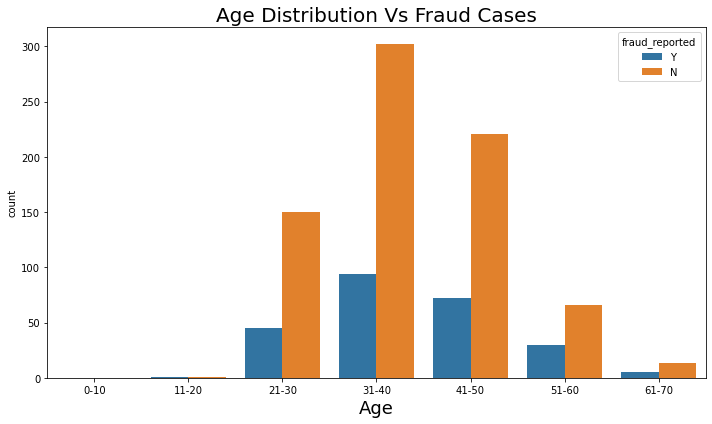

In [38]:
plt.figure(figsize=(10,6))
sns.countplot(x=df.age_bins, hue=df.fraud_reported)
plt.xlabel('Age',fontsize=18)
plt.title('Age Distribution Vs Fraud Cases', fontsize=20)
plt.show()

Maximum fraud cases comes from people with age group of 31-50 year.

Very few cases in 60+ year old peoples.

###### Policy State Vs Fraud cases

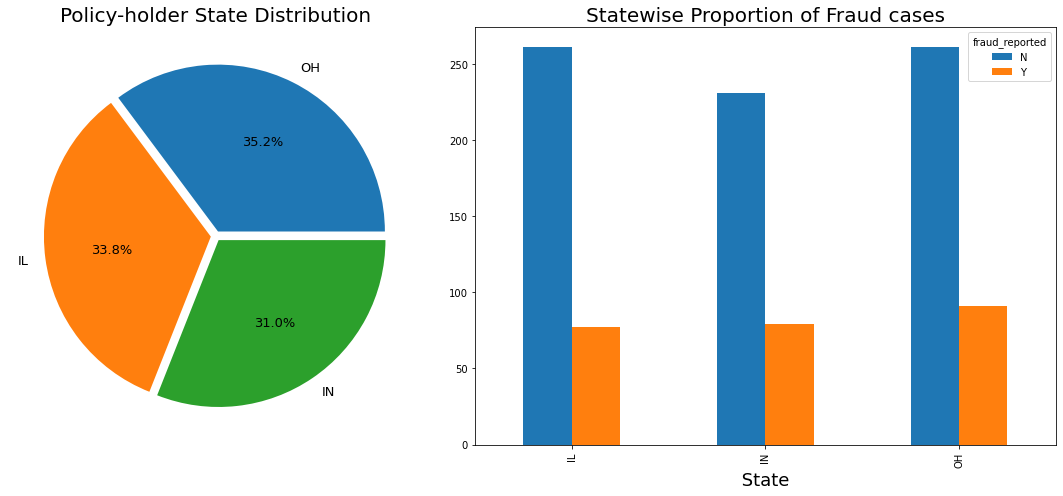

In [39]:
plt.rcParams["figure.autolayout"] = True
fig,ax=plt.subplots(1,2,figsize=(16,7))
df['policy_state'].value_counts().plot.pie(explode=[0.03,0.03,0.03],autopct='%2.1f%%',fontsize=13, ax=ax[0])
ax[0].set_title('Policy-holder State Distribution', fontsize=20)
ax[0].set_ylabel('')
table = pd.crosstab(df['policy_state'], df['fraud_reported'])
table.plot(kind = 'bar', ax=ax[1])
ax[1].set_title('Statewise Proportion of Fraud cases',fontsize=20)
ax[1].set_xlabel(" State ",fontsize=18)
plt.tight_layout()
plt.show()

Almost same amout of cases come from each state.

Maximum fraud cases come from state of Ohio.

###### Insured Gender VS Fraud cases

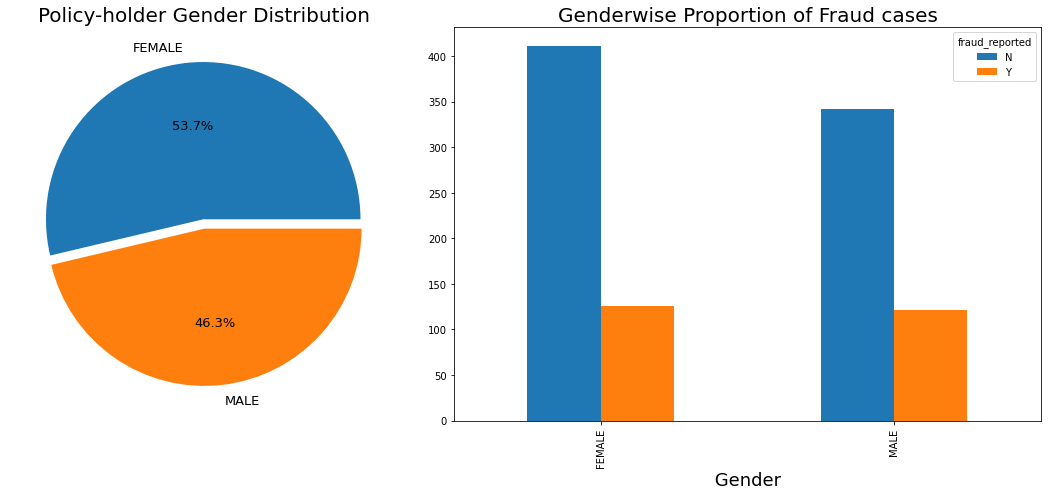

In [40]:
plt.rcParams["figure.autolayout"] = True
fig,ax=plt.subplots(1,2,figsize=(16,7))
df['insured_sex'].value_counts().plot.pie(explode=[0.03,0.03],autopct='%2.1f%%',fontsize=13, ax=ax[0])
ax[0].set_title('Policy-holder Gender Distribution', fontsize=20)
ax[0].set_ylabel('')
table = pd.crosstab(df['insured_sex'], df['fraud_reported'])
table.plot(kind = 'bar', ax=ax[1])
ax[1].set_title('Genderwise Proportion of Fraud cases',fontsize=20)
ax[1].set_xlabel(" Gender ",fontsize=18)
plt.tight_layout()
plt.show()


Number of claims come from female is higher than which reported by male insured.

Almost same amount of fraud cases comes from same gender.

###### Education_level vs Fraud cases

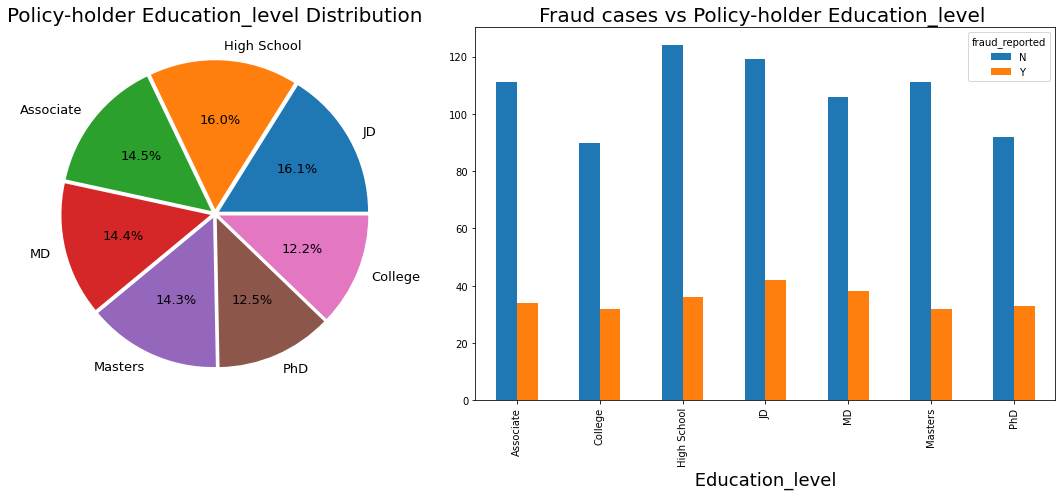

In [42]:
plt.rcParams["figure.autolayout"] = True
fig,ax=plt.subplots(1,2,figsize=(16,7))
df['insured_education_level'].value_counts().plot.pie(explode=[0.03,0.03,0.03,0.03,0.03,0.03,.03],autopct='%2.1f%%',fontsize=13, ax=ax[0])
ax[0].set_title('Policy-holder Education_level Distribution', fontsize=20)
ax[0].set_ylabel('')
table = pd.crosstab(df['insured_education_level'], df['fraud_reported'])
table.plot(kind = 'bar', ax=ax[1])
ax[1].set_title('Fraud cases vs Policy-holder Education_level ',fontsize=20)
ax[1].set_xlabel(" Education_level ",fontsize=18)
plt.tight_layout()
plt.show()

###### Occupation of Insured Customers

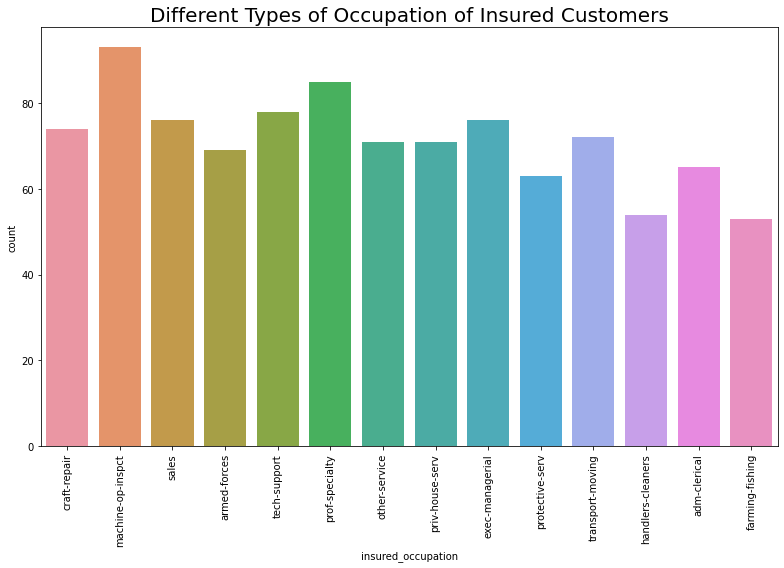

In [45]:
 # let's check the insured occupation
plt.rcParams['figure.figsize'] = (11, 8)
sns.countplot(df['insured_occupation'])
plt.title('Different Types of Occupation of Insured Customers' ,fontsize=20)
plt.xticks(rotation = 90)
plt.show()


###### Hobbies of Insured Customers

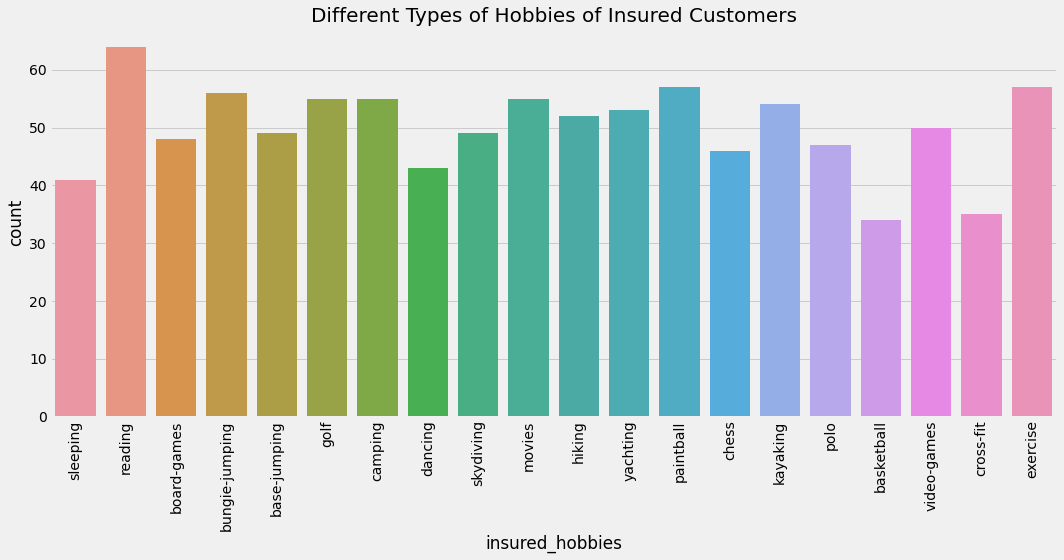

In [49]:
# let's check the insured hobbies
plt.rcParams['figure.figsize'] = (15, 8)
sns.countplot(df['insured_hobbies'])
plt.title('Different Types of Hobbies of Insured Customers',fontsize=20)
plt.xticks(rotation = 90)
plt.show() 

###### Different Types of Incidents Vs Fraud cases

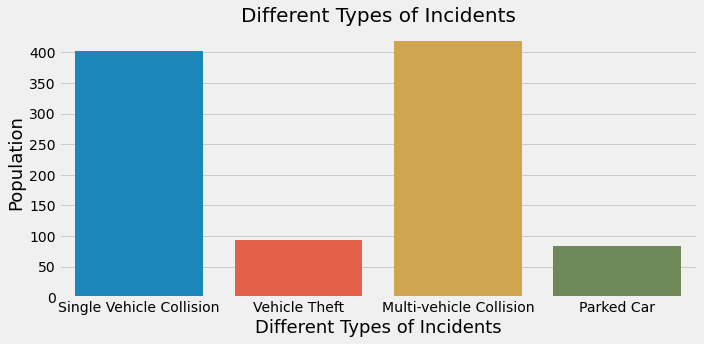

In [50]:
# let's check the incident types
plt.rcParams['figure.figsize'] = (10,5)
sns.countplot(df['incident_type'])
plt.title('Different Types of Incidents',fontsize=20)
plt.xlabel('Different Types of Incidents', fontsize=18)
plt.ylabel('Population', fontsize=18)
plt.show()

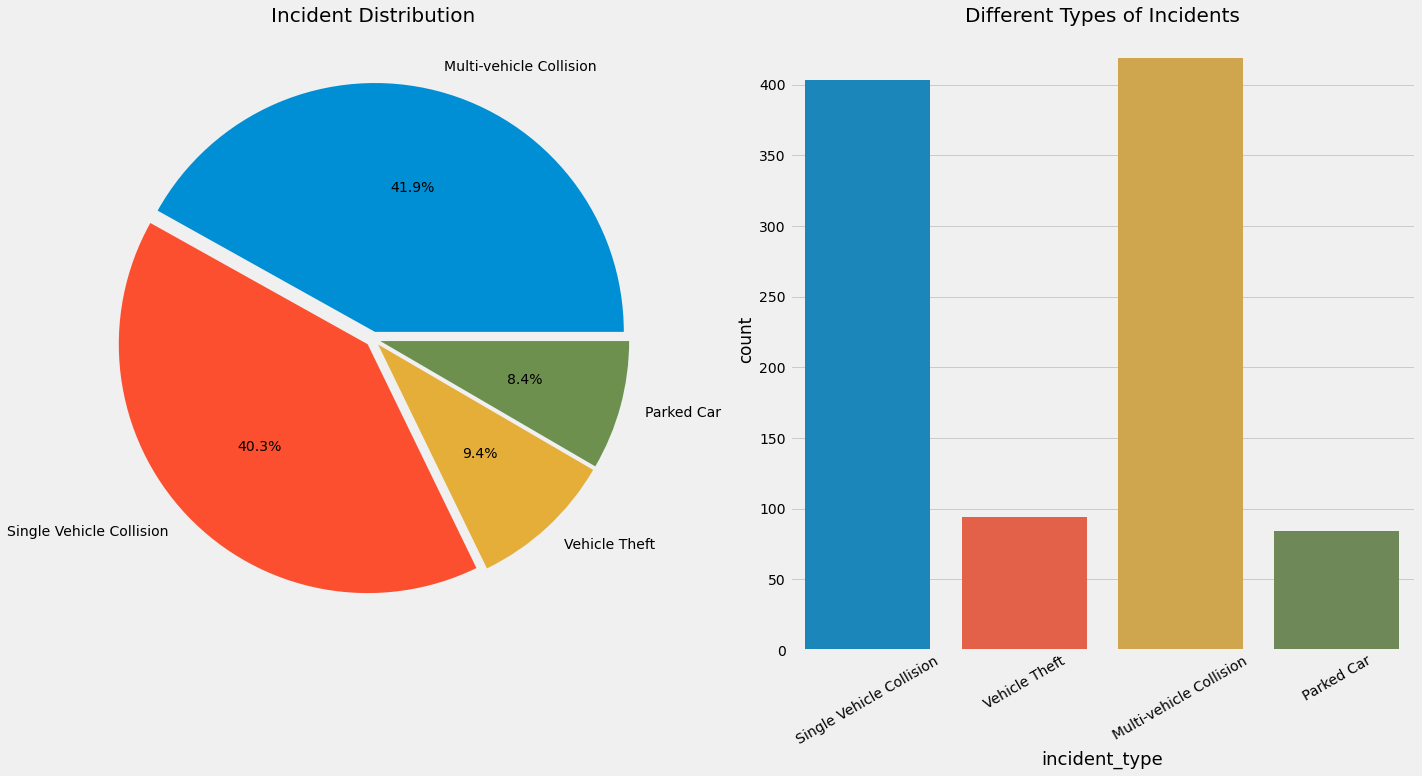

In [51]:
plt.rcParams["figure.autolayout"] = True
f,ax=plt.subplots(1,2,figsize=(20,11))
df['incident_type'].value_counts().plot.pie(explode=[0.03,.03,.03,.03],autopct='%3.1f%%',fontsize=14, ax=ax[0])
ax[0].set_title('Incident Distribution', fontsize=20)
ax[0].set_ylabel('')
sns.countplot('incident_type',data=df,ax=ax[1])
ax[1].set_title('Different Types of Incidents',fontsize=20)
ax[1].set_xlabel("incident_type",fontsize=18)
plt.xticks(fontsize=14,rotation=30)
plt.tight_layout()
plt.show()

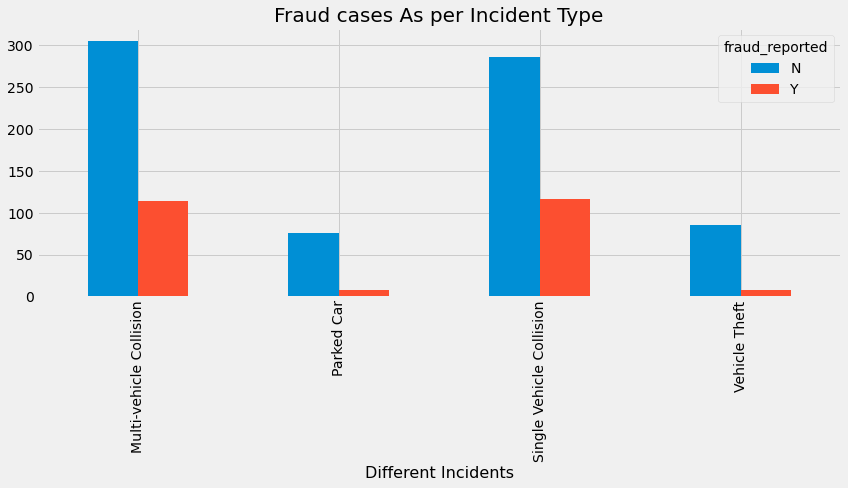

In [52]:
# let's check the insured hobbies
plt.rcParams['figure.figsize'] = (12,7)
table = pd.crosstab(df['incident_type'], df['fraud_reported'])
table.plot(kind = 'bar')
plt.title('Fraud cases As per Incident Type',fontsize=20)
plt.xlabel('Different Incidents', fontsize=16)
plt.xticks(fontsize=14)
plt.show() 

Most of case comes from Multi-vehicle and single vehicle collision.

Some claims are due to automobile robbery.

One claim out of three claim is fraud in multi or single vehicle collision incident.

###### Exploration of different Collision

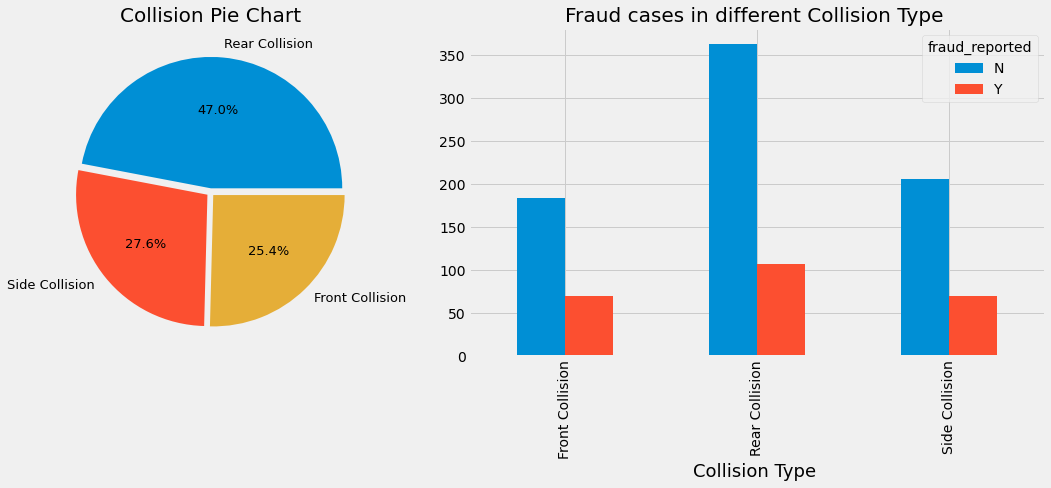

In [55]:
plt.rcParams["figure.autolayout"] = True
fig,ax=plt.subplots(1,2,figsize=(16,7))
df['collision_type'].value_counts().plot.pie(explode=[0.03,0.03,0.03],autopct='%2.1f%%',fontsize=13, ax=ax[0])
ax[0].set_title('Collision Pie Chart', fontsize=20)
ax[0].set_ylabel('')
table = pd.crosstab(df['collision_type'], df['fraud_reported'])
table.plot(kind = 'bar', ax=ax[1])
ax[1].set_title('Fraud cases in different Collision Type ',fontsize=20)
ax[1].set_xlabel("Collision Type ",fontsize=18)
plt.tight_layout()
plt.show()

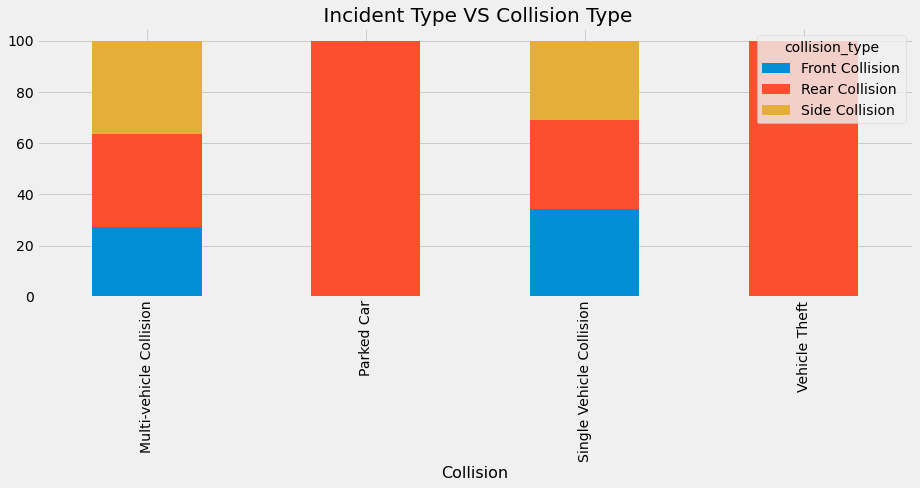

In [56]:
# let's check the insured hobbies
plt.rcParams['figure.figsize'] = (13,7)
table = pd.crosstab(df['incident_type'], df['collision_type'])
(table.div(table.sum(axis=1),axis=0)*100).plot(kind='bar',stacked=True)
plt.title(' Incident Type VS Collision Type',fontsize=20)
plt.xlabel('Collision', fontsize=16)
plt.show() 

###### Collision VS Incident Severity

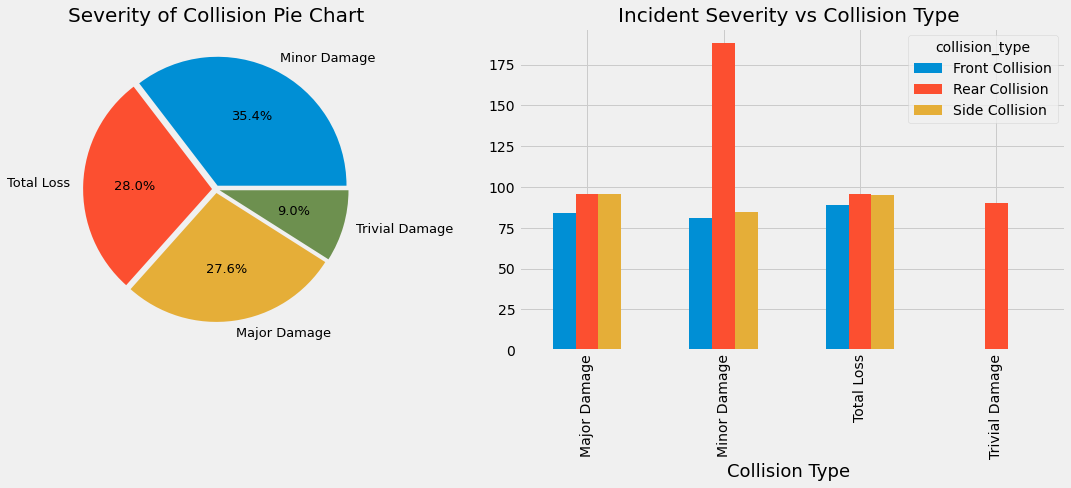

In [57]:
plt.rcParams["figure.autolayout"] = True
fig,ax=plt.subplots(1,2,figsize=(16,7))
df['incident_severity'].value_counts().plot.pie(explode=[0.03,0.03,0.03,.03],autopct='%2.1f%%',fontsize=13, ax=ax[0])
ax[0].set_title('Severity of Collision Pie Chart', fontsize=20)
ax[0].set_ylabel('')

table = pd.crosstab(df['incident_severity'], df['collision_type'])
table.plot(kind = 'bar', ax=ax[1])
ax[1].set_title('Incident Severity vs Collision Type ',fontsize=20)
ax[1].set_xlabel("Collision Type ",fontsize=18)
plt.tight_layout()
plt.show()

In [59]:
pd.crosstab(df['incident_type'], df['incident_severity'])

incident_severity,Major Damage,Minor Damage,Total Loss,Trivial Damage
incident_type,,,,
Multi-vehicle Collision,144,130,145,0
Parked Car,0,42,0,42
Single Vehicle Collision,132,136,135,0
Vehicle Theft,0,46,0,48


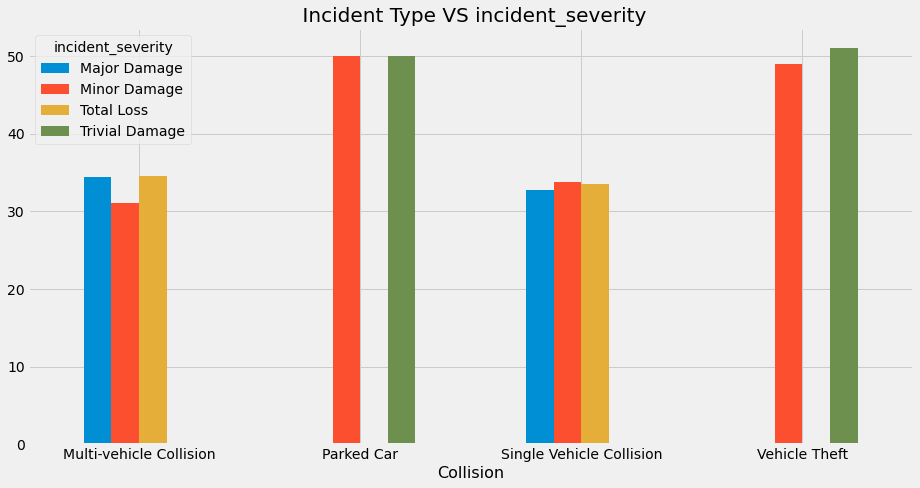

In [60]:
# let's check the insured hobbies
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (13,7)
table = pd.crosstab(df['incident_type'], df['incident_severity'])
(table.div(table.sum(axis=1),axis=0)*100).plot(kind='bar')
plt.title(' Incident Type VS incident_severity',fontsize=20)
plt.xlabel('Collision', fontsize=16)
plt.xticks(fontsize=14,rotation=0)
plt.show() 

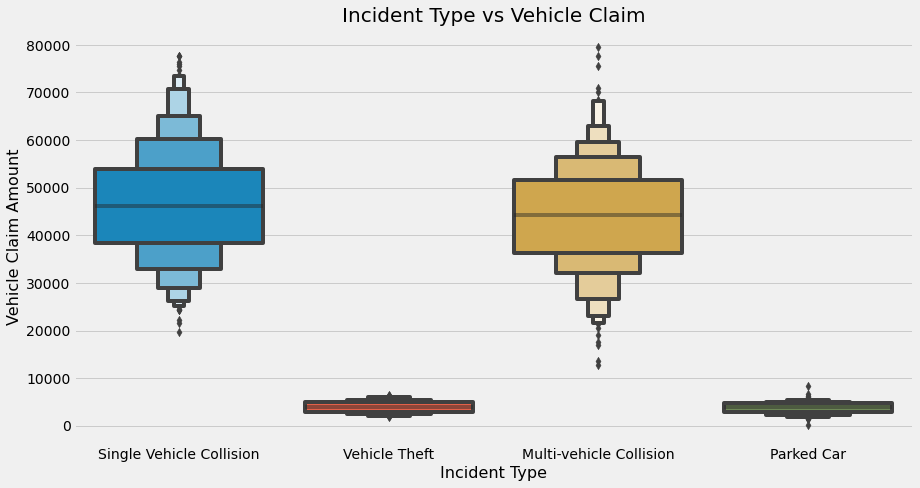

In [61]:
plt.rcParams['figure.figsize'] = (13,7)
sns.boxenplot(df['incident_type'], df['vehicle_claim'])
plt.title('Incident Type vs Vehicle Claim',fontsize=20)
plt.xlabel('Incident Type', fontsize=16)
plt.ylabel('Vehicle Claim Amount', fontsize=16)
plt.show()

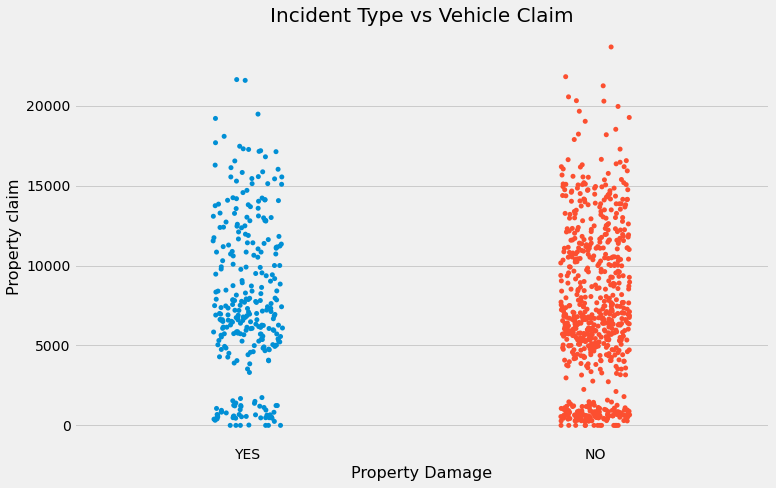

In [62]:
plt.rcParams['figure.figsize'] = (11,7)
sns.stripplot(df['property_damage'], df['property_claim'])
plt.title('Incident Type vs Vehicle Claim',fontsize=20)
plt.xlabel('Property Damage', fontsize=16)
plt.ylabel('Property claim', fontsize=16)
plt.show()

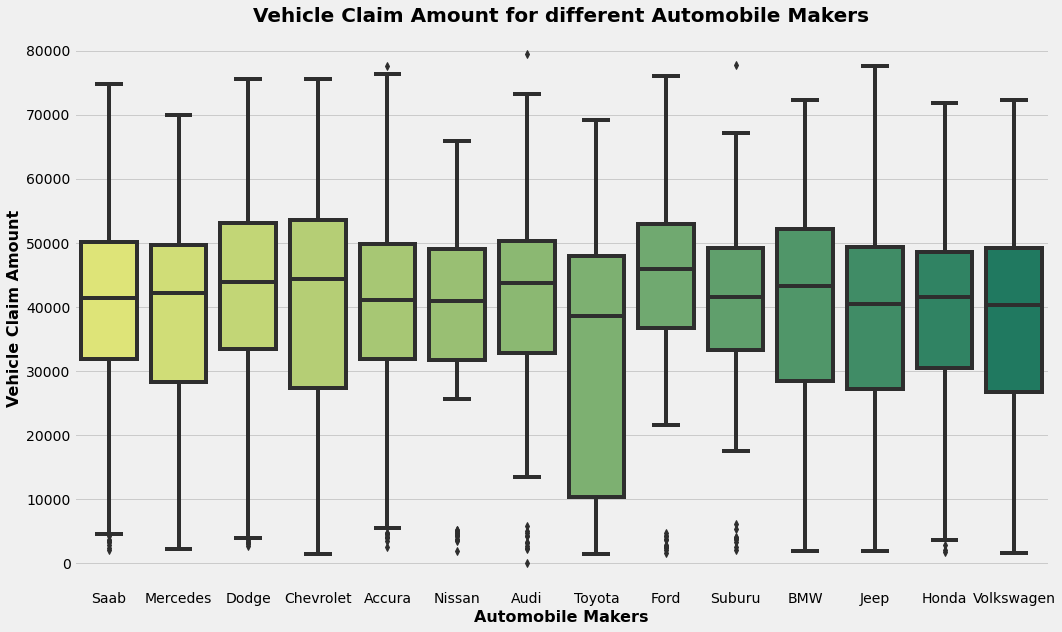

In [63]:
# swarm plot
plt.rcParams['figure.figsize'] = (15,9)
sns.boxplot(df['auto_make'], df['vehicle_claim'], palette = 'summer_r')
plt.title('Vehicle Claim Amount for different Automobile Makers',fontsize=20,fontweight ='bold')
plt.xlabel('Automobile Makers', fontsize=16,fontweight='bold')
plt.ylabel('Vehicle Claim Amount', fontsize=16,fontweight='bold')
plt.show()

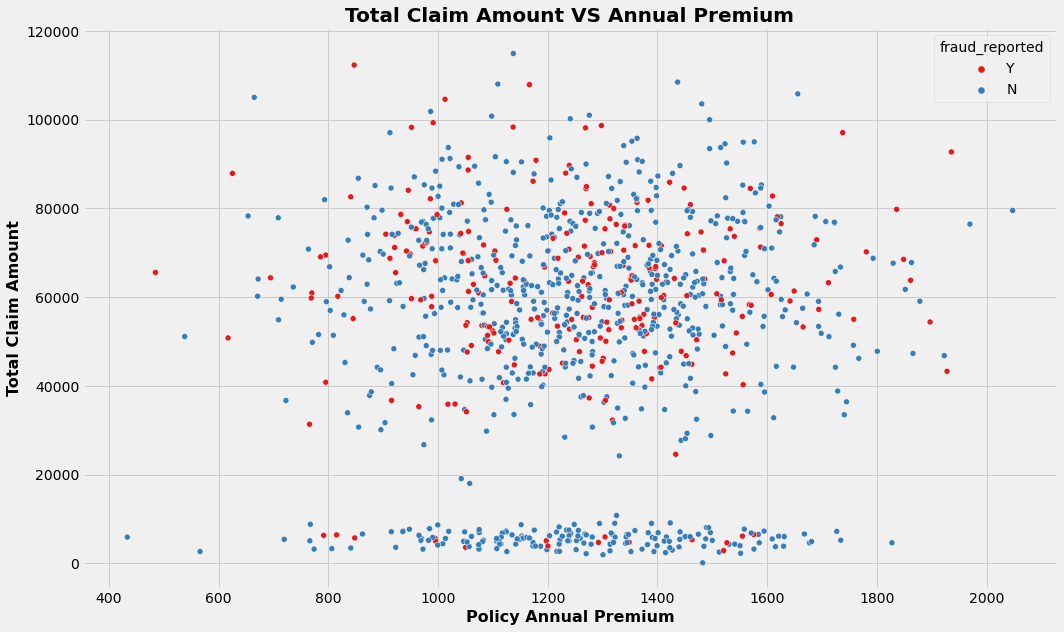

In [64]:
# swarm plot
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (15,9)
sns.scatterplot(df['policy_annual_premium'], df['total_claim_amount'], hue=df.fraud_reported, palette = 'Set1')
plt.title('Total Claim Amount VS Annual Premium',fontsize=20,fontweight ='bold')
plt.xlabel('Policy Annual Premium', fontsize=16,fontweight='bold')
plt.ylabel('Total Claim Amount', fontsize=16,fontweight='bold')
plt.show()

## Encoding categorical data

In [65]:
Category = ['policy_state', 'insured_sex', 'insured_education_level', 'insured_occupation',
            'insured_hobbies', 'insured_relationship', 'incident_type', 'collision_type', 'incident_severity',
            'authorities_contacted', 'incident_state', 'incident_city', 'property_damage', 'police_report_available', 
            'auto_make', 'auto_model', 'fraud_reported', 'CSL_Personal', 'CSL_Accidental']

In [68]:
# Using Label Encoder on categorical variable
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in Category:
    df[i] = le.fit_transform(df[i])
df.head()

,months_as_customer,age,policy_state,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_hobbies,...,fraud_reported,CSL_Personal,CSL_Accidental,policy_bind_day,policy_bind_month,policy_bind_year,incident_day,incident_month,Automobile_Age,age_bins
0,328,48,2,1000,1406.91,0,1,4,2,17,...,1,1,2,17,10,2014,25,1,11,41-50
1,228,42,1,2000,1197.22,5000000,1,4,6,15,...,1,1,2,27,6,2006,21,1,8,41-50
2,134,29,2,2000,1413.14,5000000,0,6,11,2,...,0,0,1,9,6,2000,22,2,8,21-30
3,256,41,0,2000,1415.74,6000000,0,6,1,2,...,1,1,2,25,5,1990,1,10,1,41-50
4,228,44,0,1000,1583.91,6000000,1,0,11,2,...,0,2,0,6,6,2014,17,2,6,41-50


In [70]:
df.drop(['age_bins'],axis=1,inplace=True)

In [71]:
# Sort columns by datatypes
df.columns.to_series().groupby(df.dtypes).groups

{int64: ['months_as_customer', 'age', 'policy_state', 'policy_deductable', 'umbrella_limit', 'insured_sex', 'insured_education_level', 'insured_occupation', 'insured_hobbies', 'insured_relationship', 'capital-gains', 'capital-loss', 'incident_type', 'collision_type', 'incident_severity', 'authorities_contacted', 'incident_state', 'incident_city', 'incident_hour_of_the_day', 'number_of_vehicles_involved', 'property_damage', 'bodily_injuries', 'witnesses', 'police_report_available', 'total_claim_amount', 'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make', 'auto_model', 'fraud_reported', 'CSL_Personal', 'CSL_Accidental', 'policy_bind_day', 'policy_bind_month', 'policy_bind_year', 'incident_day', 'incident_month', 'Automobile_Age'], float64: ['policy_annual_premium']}

# Feature selection and Engineering

#### 1. Outliers Detection and Removal

In [72]:
Numerical = ['months_as_customer', 'age', 'policy_deductable', 'umbrella_limit', 'capital-gains', 'capital-loss',
             'incident_hour_of_the_day', 'number_of_vehicles_involved', 'bodily_injuries', 'witnesses', 
             'total_claim_amount','injury_claim', 'property_claim', 'vehicle_claim', 'policy_bind_day', 
             'policy_bind_month', 'policy_bind_year', 'incident_day', 'incident_month', 'Automobile_Age','policy_annual_premium']

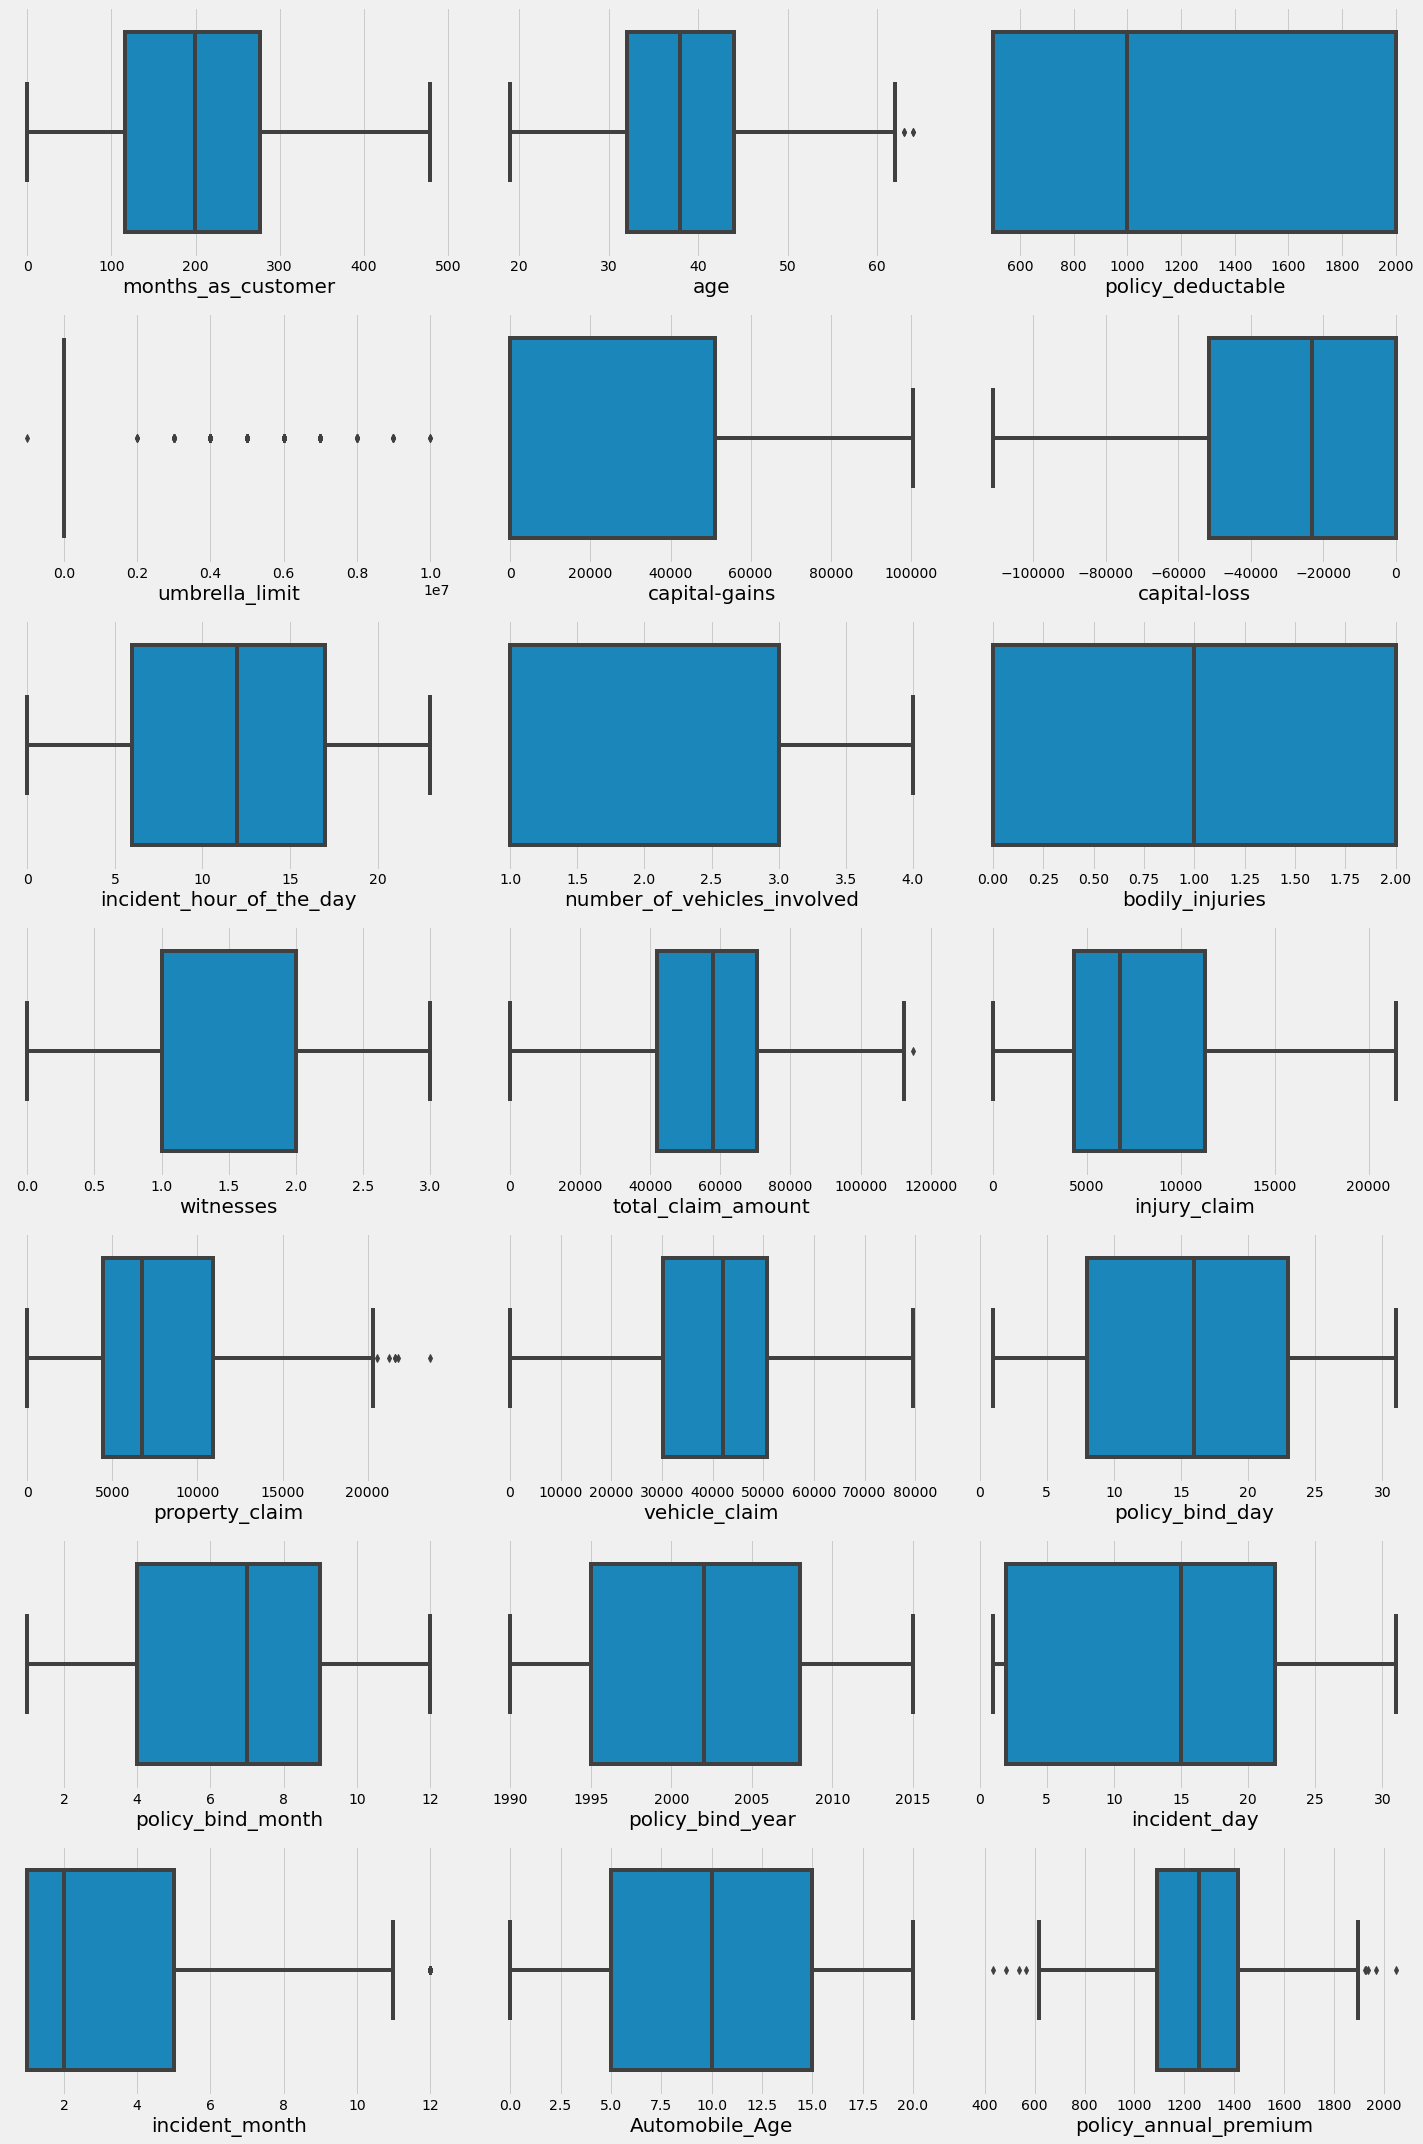

In [73]:
plt.figure(figsize=(20,30))
plotnumber=1

for column in Numerical:
    if plotnumber<=21:
        ax=plt.subplot(7,3,plotnumber)
        sns.boxplot(df[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()


In [74]:
from scipy.stats import zscore
z = np.abs(zscore(df))
threshold = 3
df1 = df[(z<3).all(axis = 1)]

print ("Shape of the dataframe before removing outliers: ", df.shape)
print ("Shape of the dataframe after removing outliers: ", df1.shape)
print ("Percentage of data loss post outlier removal: ", (df.shape[0]-df1.shape[0])/df.shape[0]*100)

df=df1.copy() # reassigning the changed dataframe name to our original dataframe name

Shape of the dataframe before removing outliers:  (1000, 40)
Shape of the dataframe after removing outliers:  (980, 40)
Percentage of data loss post outlier removal:  2.0


###### 2. Skewness

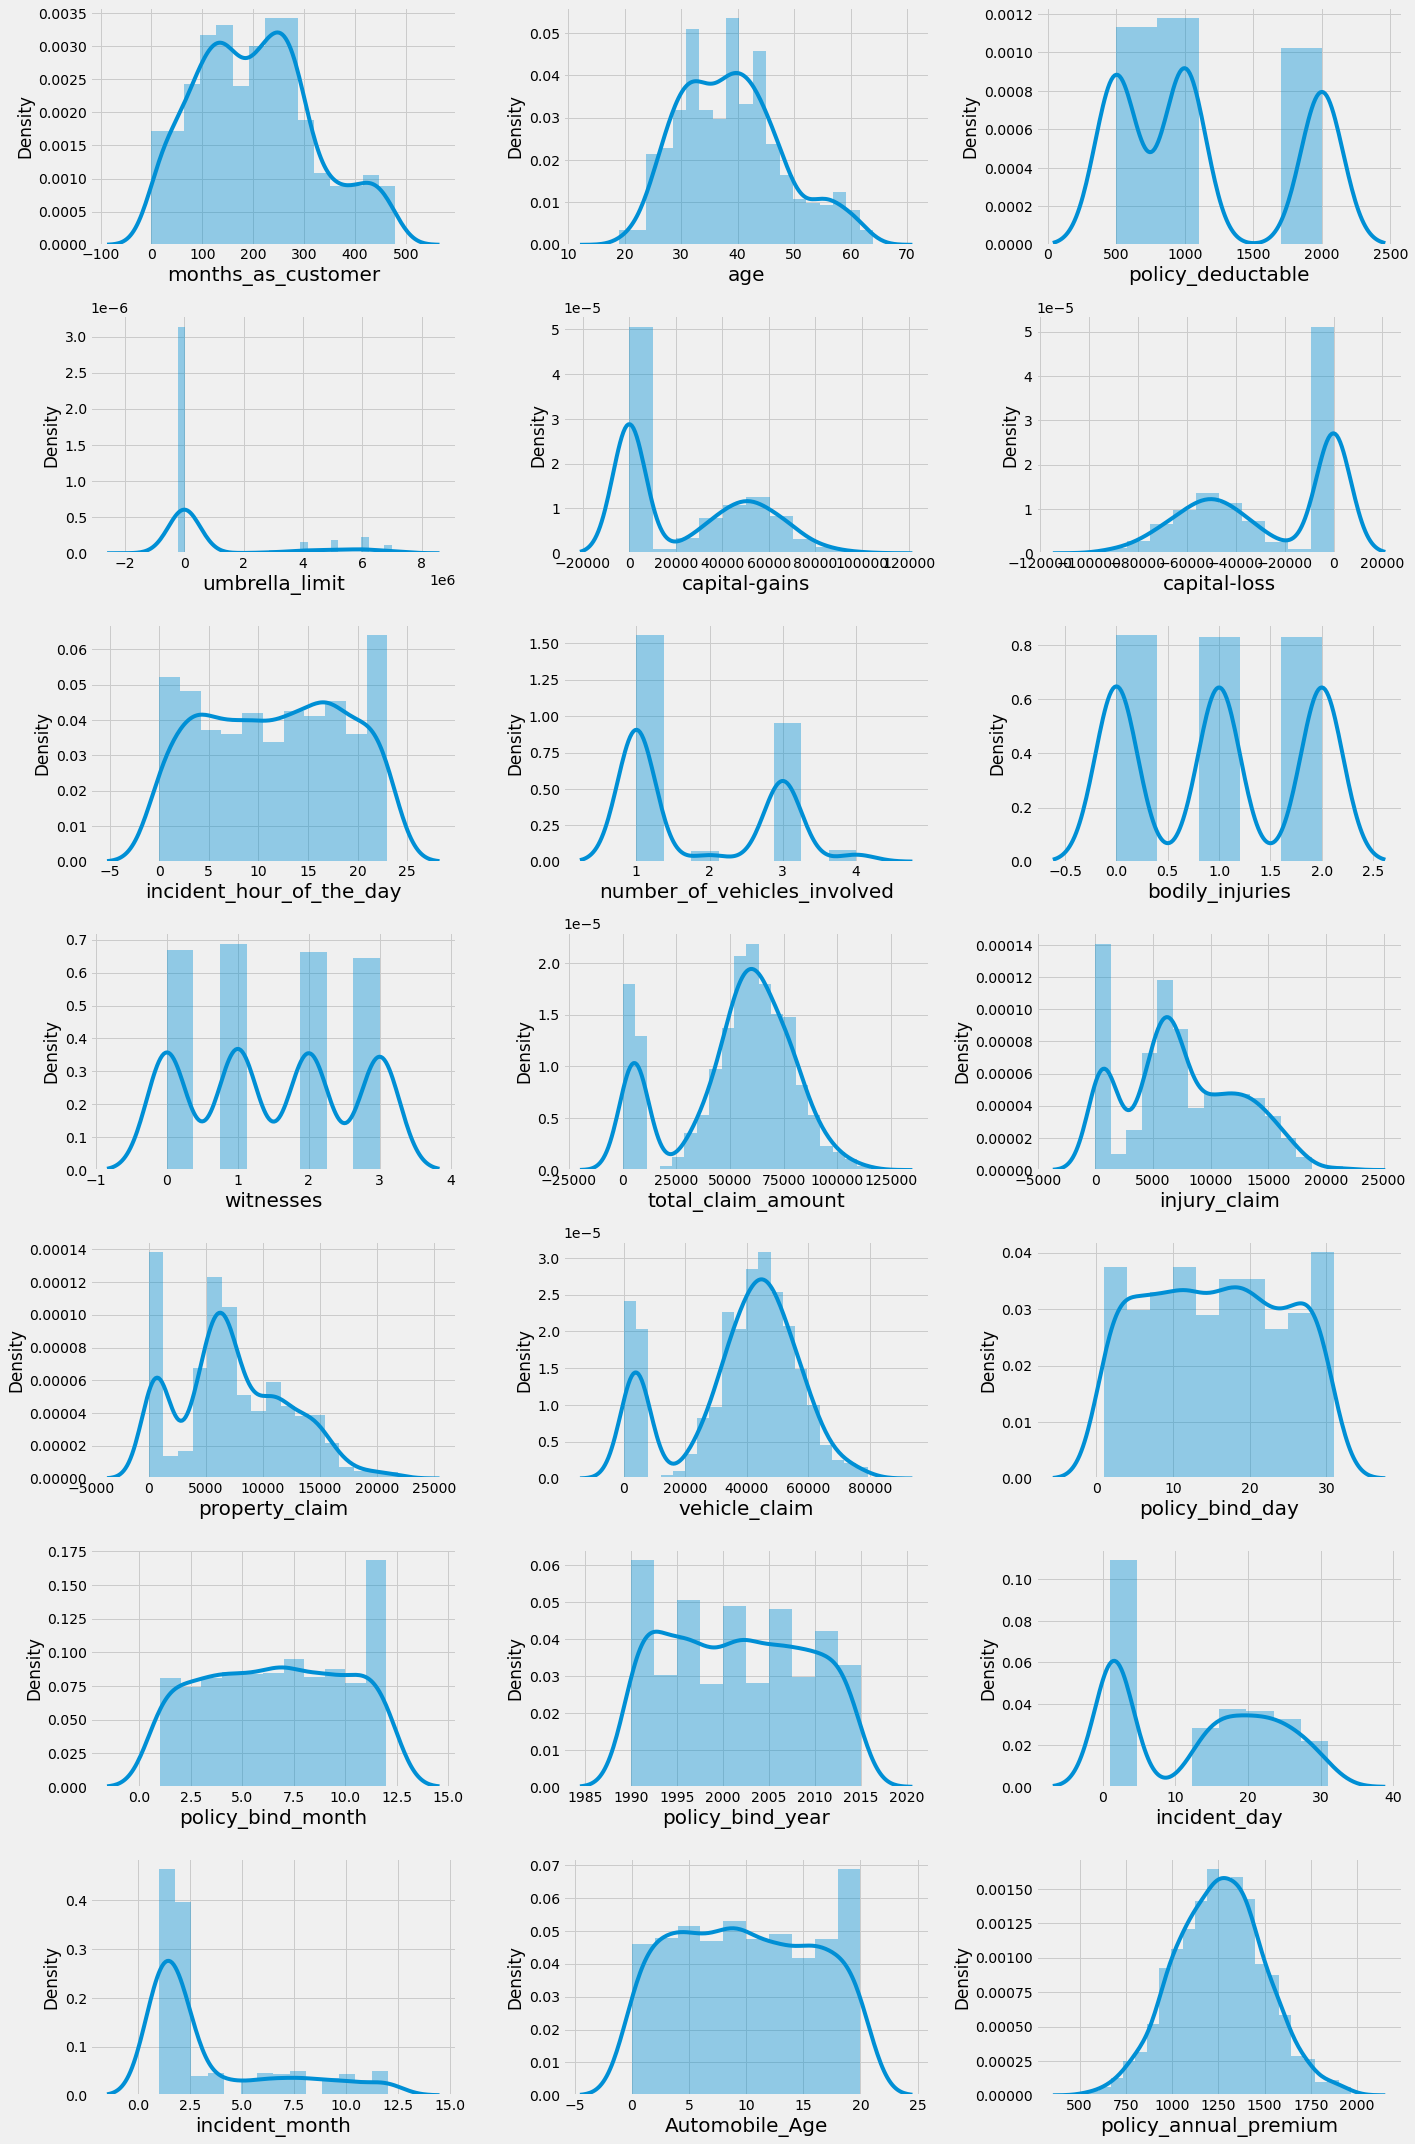

In [75]:
plt.figure(figsize=(20,30))
plotnum=1
for col in Numerical:
    if plotnum<=21:
        plt.subplot(7,3,plotnum)
        sns.distplot(df[col])
        plt.xlabel(col,fontsize=20)
    plotnum+=1
plt.show()

No relevence of skweness for discrete numerical feature like month and categorical feature.

In [76]:
df[Numerical].skew()

months_as_customer             0.362608
age                            0.475385
policy_deductable              0.476090
umbrella_limit                 1.801424
capital-gains                  0.466619
capital-loss                  -0.376884
incident_hour_of_the_day      -0.039280
number_of_vehicles_involved    0.509725
bodily_injuries                0.003757
witnesses                      0.026211
total_claim_amount            -0.593593
injury_claim                   0.271759
property_claim                 0.361356
vehicle_claim                 -0.620936
policy_bind_day                0.028152
policy_bind_month             -0.024643
policy_bind_year               0.065022
incident_day                   0.055443
incident_month                 1.388336
Automobile_Age                 0.054522
policy_annual_premium          0.035964
dtype: float64

'umbrella_limit','total_claim_amount' and 'vehicle_claim' are continous variable with skew data.

The variable 'incident_month' is skewed but it is discrete in nature

In [77]:
# Making the skew less than or equal to +0.5 and -0.5 for better prediction using yeo-johnson method
skew=['total_claim_amount','vehicle_claim']

# Importing Powertransformer
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')

# Transfroming skew data
df[skew] = scaler.fit_transform(df[skew].values)

In [78]:
df[skew].skew()

total_claim_amount   -0.508540
vehicle_claim        -0.521805
dtype: float64

###### 3. Corrleation

In [79]:
df.corr()

,months_as_customer,age,policy_state,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_hobbies,...,auto_model,fraud_reported,CSL_Personal,CSL_Accidental,policy_bind_day,policy_bind_month,policy_bind_year,incident_day,incident_month,Automobile_Age
months_as_customer,1.000000,0.922960,-0.007183,0.031041,-0.003814,0.018213,0.059644,-0.000731,0.006925,-0.089358,...,0.005130,0.021285,-0.021855,0.007121,0.050824,0.004207,-0.041914,-0.010538,0.019242,-0.000869
age,0.922960,1.000000,-0.020012,0.032036,0.005330,0.013256,0.073790,0.001647,0.014798,-0.079099,...,0.015322,0.013279,-0.013323,0.011258,0.053147,0.014492,-0.031709,-0.005843,0.018221,-0.005594
policy_state,-0.007183,-0.020012,1.000000,0.017612,0.015089,-0.010921,-0.018002,-0.027173,-0.025357,-0.039501,...,-0.018008,0.034587,0.001653,0.029007,-0.000583,0.073692,-0.003045,0.016049,0.027889,0.001160
policy_deductable,0.031041,0.032036,0.017612,1.000000,-0.008300,0.013471,-0.006977,0.014101,-0.053888,-0.001923,...,-0.002591,0.015774,0.009912,-0.014554,0.013395,-0.054208,-0.054041,-0.018115,-0.010288,-0.030569
policy_annual_premium,-0.003814,0.005330,0.015089,-0.008300,1.000000,-0.014107,0.041312,-0.021400,0.027827,-0.014226,...,-0.038226,-0.012686,0.032654,-0.001868,-0.032681,-0.031608,0.002433,0.018671,0.009544,0.042446
umbrella_limit,0.018213,0.013256,-0.010921,0.013471,-0.014107,1.000000,0.018068,-0.030887,0.003973,-0.034098,...,0.015360,0.044729,0.013504,0.025418,-0.030416,-0.001072,0.049032,-0.031948,0.029210,-0.027952
insured_sex,0.059644,0.073790,-0.018002,-0.006977,0.041312,0.018068,1.000000,0.010068,-0.007440,-0.020928,...,-0.018657,0.020582,-0.003405,0.071995,0.047690,-0.003125,-0.031230,-0.017208,0.036916,0.033336
insured_education_level,-0.000731,0.001647,-0.027173,0.014101,-0.021400,-0.030887,0.010068,1.000000,-0.025394,0.025229,...,0.042735,0.013116,0.008337,-0.005150,0.018977,-0.011963,0.016874,-0.051772,0.069564,-0.054438
insured_occupation,0.006925,0.014798,-0.025357,-0.053888,0.027827,0.003973,-0.007440,-0.025394,1.000000,-0.010375,...,0.015152,0.000277,0.016461,-0.004376,0.003377,0.020690,-0.026467,-0.020565,0.013989,-0.000915
insured_hobbies,-0.089358,-0.079099,-0.039501,-0.001923,-0.014226,-0.034098,-0.020928,0.025229,-0.010375,1.000000,...,0.034818,-0.048181,-0.003695,0.035959,0.035344,-0.003806,-0.020370,0.016051,-0.001147,0.018361


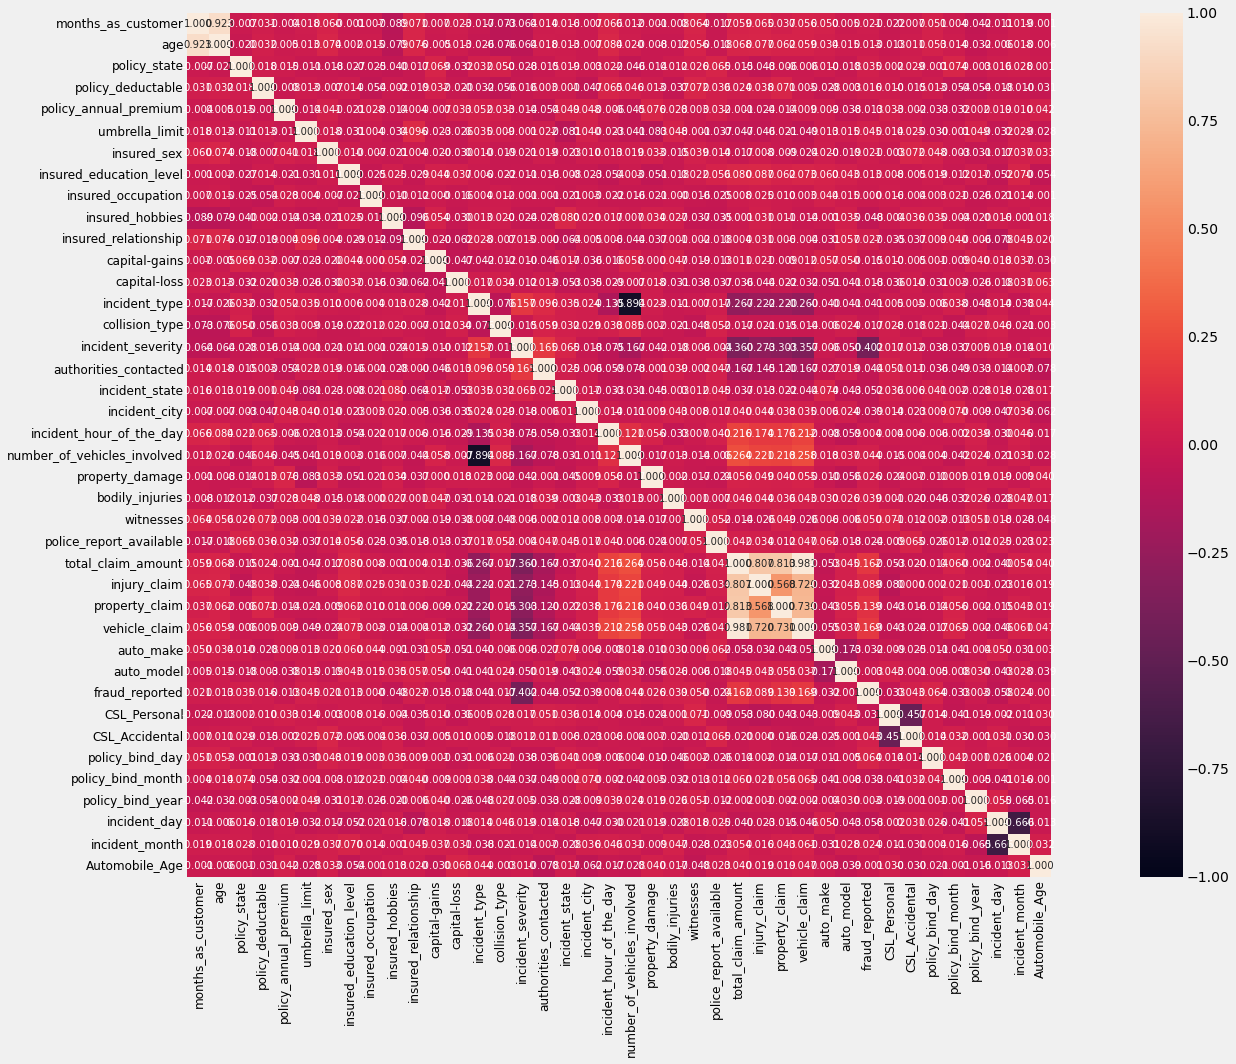

In [80]:
plt.figure(figsize=(25,15))
sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, square=True, fmt='0.3f', 
            annot_kws={'size':10},)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

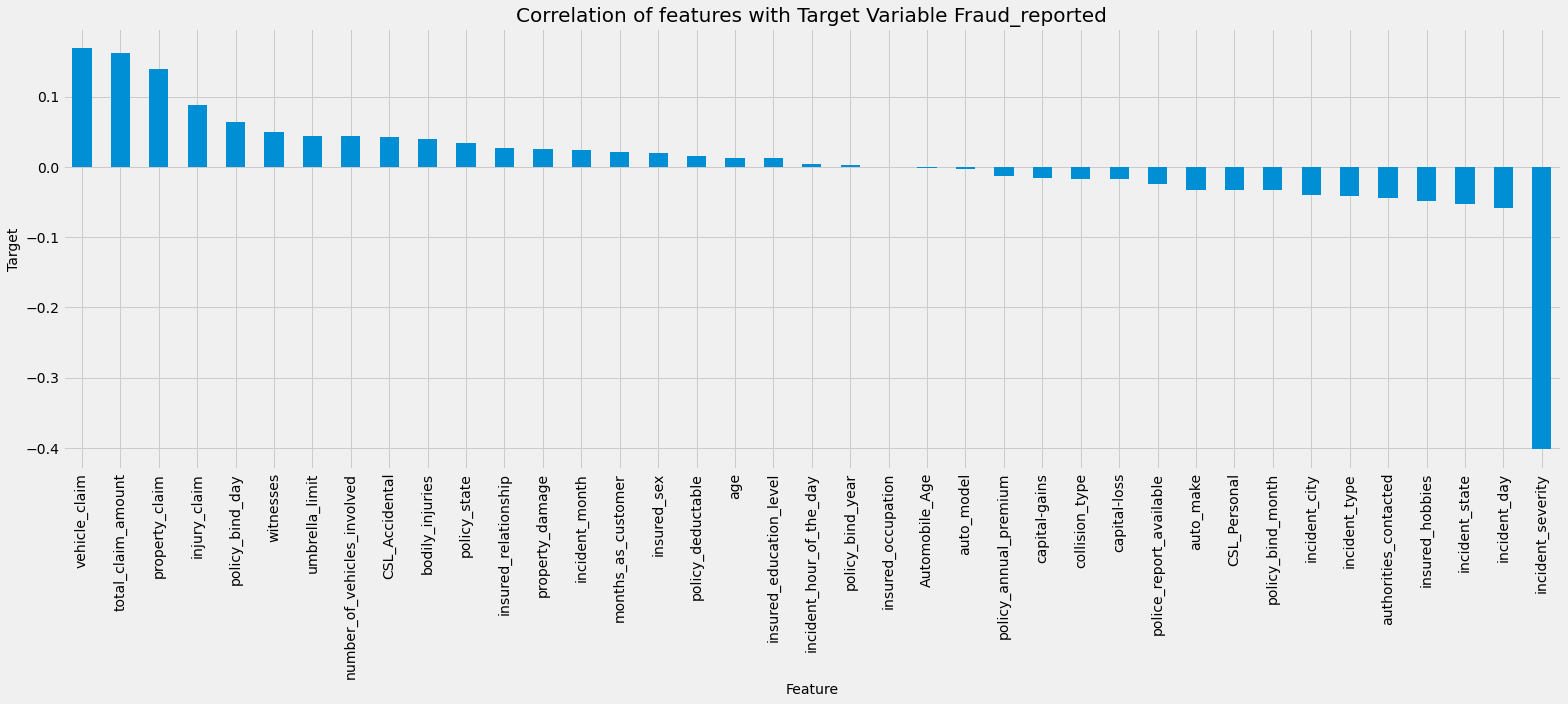

In [81]:
plt.figure(figsize=(22,10))
df.corr()['fraud_reported'].sort_values(ascending=False).drop(['fraud_reported']).plot(kind='bar')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('Target',fontsize=14)
plt.title('Correlation of features with Target Variable Fraud_reported',fontsize=20)
plt.show()

Incident_severity is correlated with target variable with correlation of 0.4. Other variable are poorly correlated with target variable.

Other variable are poorly correlated with target variable.

injury_claim,property_claim,vehicle_claim are highly correlated with each other.

incident_hour_of_the_day is highly negative correlated with incident type.

###### 4. Balanceing Imbalanced target feature

In [82]:
df.fraud_reported.value_counts()

0    740
1    240
Name: fraud_reported, dtype: int64

In [85]:
# Balancing using SMOTE
from imblearn.over_sampling import SMOTE
X = df.drop(['fraud_reported'], axis =1)
Y = df['fraud_reported']

In [86]:
# Oversampleing using SMOTE Techniques
oversample = SMOTE()
X, Y = oversample.fit_resample(X, Y)

In [87]:
Y.value_counts()

1    740
0    740
Name: fraud_reported, dtype: int64

In [88]:
# Standard Scaling
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
X_scale = scaler.fit_transform(X)

###### 5. Checking Multicollinearity between features using variance_inflation_factor

In [89]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(X_scale,i) for i in range(len(X.columns))]
vif["Features"] = X.columns
vif

,VIF values,Features
0,7.483777,months_as_customer
1,7.472602,age
2,1.067140,policy_state
3,1.069612,policy_deductable
4,1.053411,policy_annual_premium
5,1.045769,umbrella_limit
6,1.075863,insured_sex
7,1.058110,insured_education_level
8,1.039126,insured_occupation
9,1.073158,insured_hobbies


Removing Some of highly correlated features. But this will not work here as most of input features are correlated with each other either moderated or poorly.



## PCA

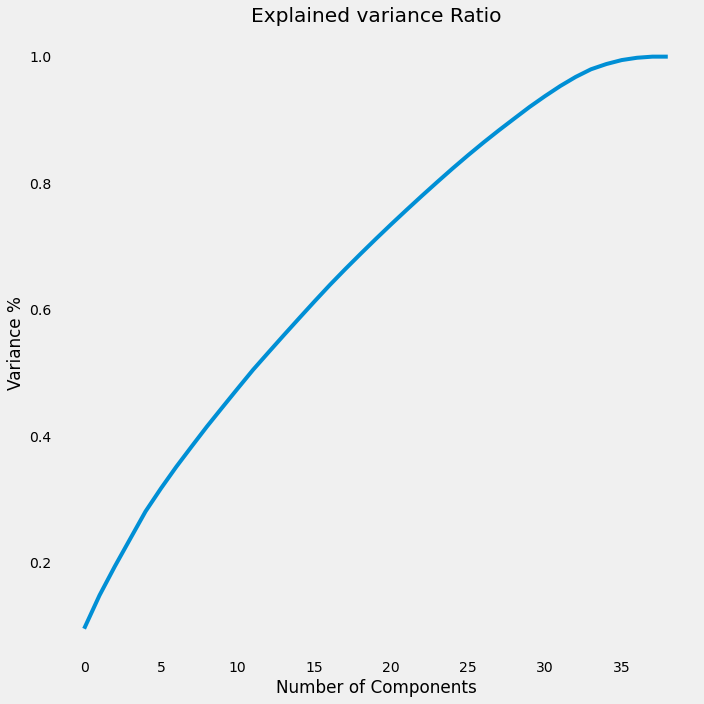

In [93]:
from sklearn.decomposition import PCA
pca = PCA()
x_pca = pca.fit_transform(X_scale)
plt.figure(figsize=(10,10))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance %')
plt.title('Explained variance Ratio')
plt.grid()

28 principal components attribute for 90% of variation in the data

In [94]:
pca_new = PCA(n_components=28)
x_new = pca_new.fit_transform(X_scale)

In [95]:
principle_x=pd.DataFrame(x_new,columns=np.arange(28))

#  Model Building

In [96]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,f1_score

#### Best Random state

In [97]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,f1_score
maxAccu=0
maxRS=0
for i in range(1,500):
    X_train,X_test,Y_train,Y_test = train_test_split(principle_x,Y,test_size = 0.2, random_state=i)
    log_reg=LogisticRegression()
    log_reg.fit(X_train,Y_train)
    y_pred=log_reg.predict(X_test)
    acc=accuracy_score(Y_test,y_pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print('Best accuracy is', maxAccu ,'on Random_state', maxRS)

Best accuracy is 0.831081081081081 on Random_state 100


In [98]:
X_train, X_test, Y_train, Y_test = train_test_split(principle_x, Y, random_state=100, test_size=.2)
log_reg=LogisticRegression()
log_reg.fit(X_train,Y_train)
y_pred=log_reg.predict(X_test)
print('\033[1m'+'Logistics Regression Evaluation'+'\033[0m')
print('\n')
print('\033[1m'+'Accuracy Score of Logistics Regression :'+'\033[0m', accuracy_score(Y_test, y_pred))
print('\n')
print('\033[1m'+'Confusion matrix of Logistics Regression :'+'\033[0m \n',confusion_matrix(Y_test, y_pred))
print('\n')
print('\033[1m'+'classification Report of Logistics Regression'+'\033[0m \n',classification_report(Y_test, y_pred))

Logistics Regression Evaluation


Accuracy Score of Logistics Regression : 0.831081081081081


Confusion matrix of Logistics Regression : 
 [[138  23]
 [ 27 108]]


classification Report of Logistics Regression 
               precision    recall  f1-score   support

           0       0.84      0.86      0.85       161
           1       0.82      0.80      0.81       135

    accuracy                           0.83       296
   macro avg       0.83      0.83      0.83       296
weighted avg       0.83      0.83      0.83       296



In [109]:
model=[ LogisticRegression(),
        SVC(),
        GaussianNB(),
        DecisionTreeClassifier(),
        KNeighborsClassifier(n_neighbors = 3),
        RandomForestClassifier(),
        ExtraTreesClassifier()]
        
for m in model:
    m.fit(X_train,Y_train)
    y_pred=m.predict(X_test)
    print('Classification of ',m,'is')
    print('\n')
    print('Accuracy Score : \n', accuracy_score(Y_test, y_pred))
    print('\n')
    print('Confusion matrix : \n',confusion_matrix(Y_test, y_pred))
    print('\n')
    print('Classification Report :\n',classification_report(Y_test, y_pred))
    print('\n')
    print('*'*50)

Classification of  LogisticRegression() is


Accuracy Score : 
 0.831081081081081


Confusion matrix : 
 [[138  23]
 [ 27 108]]


Classification Report :
               precision    recall  f1-score   support

           0       0.84      0.86      0.85       161
           1       0.82      0.80      0.81       135

    accuracy                           0.83       296
   macro avg       0.83      0.83      0.83       296
weighted avg       0.83      0.83      0.83       296



**************************************************
Classification of  SVC() is


Accuracy Score : 
 0.8614864864864865


Confusion matrix : 
 [[146  15]
 [ 26 109]]


Classification Report :
               precision    recall  f1-score   support

           0       0.85      0.91      0.88       161
           1       0.88      0.81      0.84       135

    accuracy                           0.86       296
   macro avg       0.86      0.86      0.86       296
weighted avg       0.86      0.86      0.86       29

# CrossValidation :

In [105]:
from sklearn.model_selection import cross_val_score
model=[LogisticRegression(),
        SVC(),
        GaussianNB(),
        DecisionTreeClassifier(),
        KNeighborsClassifier(n_neighbors = 3),
        RandomForestClassifier(),
        ExtraTreesClassifier()]

for m in model:
    score = cross_val_score(m, principle_x, Y, cv =5)
    print('\n')
    print('Cross Validation Score', m, '\n')
    print("Score :" ,score)
    print("Mean Score :",score.mean())
    print("Std deviation :",score.std())
    print('\n')
    print('*'*50)



Cross Validation Score LogisticRegression() 

Score : [0.59797297 0.69932432 0.81081081 0.82432432 0.84459459]
Mean Score : 0.7554054054054055
Std deviation : 0.09349261600589644


**************************************************


Cross Validation Score SVC() 

Score : [0.58783784 0.72972973 0.88851351 0.88513514 0.93243243]
Mean Score : 0.8047297297297298
Std deviation : 0.128421045541262


**************************************************


Cross Validation Score GaussianNB() 

Score : [0.56418919 0.69594595 0.84459459 0.86148649 0.87162162]
Mean Score : 0.7675675675675675
Std deviation : 0.12006131255665535


**************************************************


Cross Validation Score DecisionTreeClassifier() 

Score : [0.58108108 0.62837838 0.73986486 0.75       0.75337838]
Mean Score : 0.6905405405405406
Std deviation : 0.07178080220118559


**************************************************


Cross Validation Score KNeighborsClassifier(n_neighbors=3) 

Score : [0.68581081 0.

# Hyper Parameter Tuning

In [110]:
from sklearn.model_selection import GridSearchCV

In [111]:
parameter= {'criterion' : ['gini', 'entropy'],
             'max_features':['auto','sqrt','log2'],
              'min_samples_split':[3,5,8,11],
              'max_depth' : [10,20,30],
              'n_estimators' : [100,200,300,400]
             }

In [112]:
GCV = GridSearchCV(ExtraTreesClassifier(),parameter,verbose=10,n_jobs = -1)
GCV.fit(X_train,Y_train)

Fitting 5 folds for each of 288 candidates, totalling 1440 fits


GridSearchCV(estimator=ExtraTreesClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 20, 30],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_split': [3, 5, 8, 11],
                         'n_estimators': [100, 200, 300, 400]},
             verbose=10)

In [113]:
GCV.best_params_

{'criterion': 'gini',
 'max_depth': 30,
 'max_features': 'log2',
 'min_samples_split': 3,
 'n_estimators': 400}

In [114]:
Final_mod = ExtraTreesClassifier(criterion='gini',n_estimators= 400, max_depth=30 ,
                                 min_samples_split= 3, max_features= 'log2')
Final_mod.fit(X_train,Y_train)
y_pred=Final_mod.predict(X_test)
print('\033[1m'+'Accuracy Score :'+'\033[0m\n', accuracy_score(Y_test, y_pred))

Accuracy Score :
 0.8783783783783784


In [119]:
 print('Confusion matrix : \n',confusion_matrix(Y_test, y_pred))

Confusion matrix : 
 [[148  13]
 [ 23 112]]


In [118]:
 print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.92      0.89       161
           1       0.90      0.83      0.86       135

    accuracy                           0.88       296
   macro avg       0.88      0.87      0.88       296
weighted avg       0.88      0.88      0.88       296



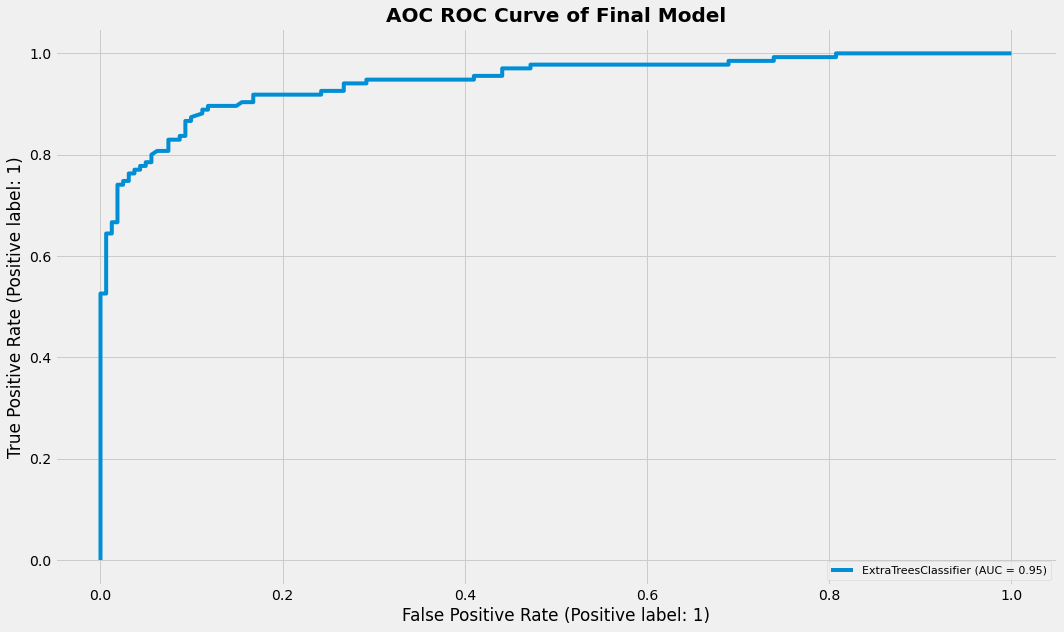

Auc Score :
 0.8744421440073613


In [116]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import plot_roc_curve
disp = plot_roc_curve(Final_mod,X_test,Y_test)   
plt.legend(prop={'size':11}, loc='lower right')
plt.title('AOC ROC Curve of Final Model',fontsize=20,fontweight='bold')
plt.show()
auc_score = roc_auc_score(Y_test, Final_mod.predict(X_test))
print('\033[1m'+'Auc Score :'+'\033[0m\n',auc_score)

# Saving model

In [ ]:
import joblib
joblib.dump(Final_mod,'Insurance_claims.pkl')